In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import numpy as np
import csv
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
drive.mount('/gdrive')
url='/gdrive/My Drive/Mali/fifa20.csv'
data=pd.read_csv(url)
data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,48,56,40000,2000,CB,Right,1,3,2,Medium/High,Normal,No,70000.0,NaN,RES,36.0,NaN,2018-07-13,2019.0,NaN,NaN,57.0,23.0,28.0,33.0,47.0,51.0,NaN,NaN,NaN,...,46,48,28,25,39,41,45,50,52,5,5,13,5,14,

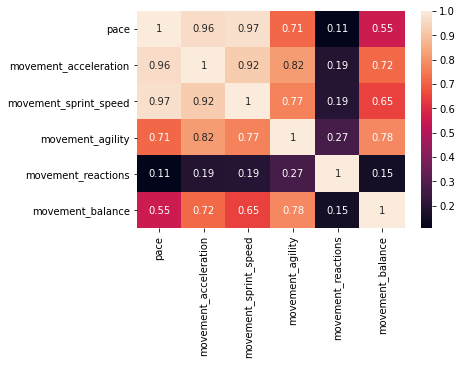

In [0]:
#melihat korelasi kolom yang akan digunakan
df = pd.DataFrame(data,columns=['pace','movement_acceleration','movement_sprint_speed','movement_agility','movement_reactions','movement_balance'])
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [0]:
#cek nilai kosong pada tiap kolom
cek1=data['pace'].isnull().sum()
cek2=data['movement_acceleration'].isnull().sum()
cek3=data['movement_sprint_speed'].isnull().sum()
cek4=data['movement_agility'].isnull().sum()
#cek5=data['movement_reactions'].isnull().sum()
cek6=data['movement_balance'].isnull().sum()
print('jumlah missing value kolom pace:', cek1)
print('jumlah missing value kolom movement_acceleration:', cek2)
print('jumlah missing value kolom movement_sprint_speed:', cek3)
print('jumlah missing value kolom movement_agility:', cek4)
print('jumlah missing value kolom movement_balance:', cek6)


jumlah missing value kolom pace: 2036
jumlah missing value kolom movement_acceleration: 0
jumlah missing value kolom movement_sprint_speed: 0
jumlah missing value kolom movement_agility: 0
jumlah missing value kolom movement_balance: 0


In [0]:
pace=data['pace']
acc=data['movement_acceleration']
sprint=data['movement_sprint_speed']
agi=data['movement_agility']
#reac=data['movement_reactions']
balance=data['movement_balance']

In [0]:
df=data[['pace','movement_acceleration','movement_sprint_speed','movement_agility','movement_balance']]
df=df.dropna()
df

,pace,movement_acceleration,movement_sprint_speed,movement_agility,movement_balance
0,87.0,91,84,93,95
1,90.0,89,91,87,71
2,91.0,94,89,96,84
4,91.0,94,88,95,94
5,76.0,77,76,78,76
...,...,...,...,...,...
18273,57.0,56,58,45,73
18274,58.0,55,61,43,76
18275,54.0,55,54,52,57
18276,59.0,55,63,55,59


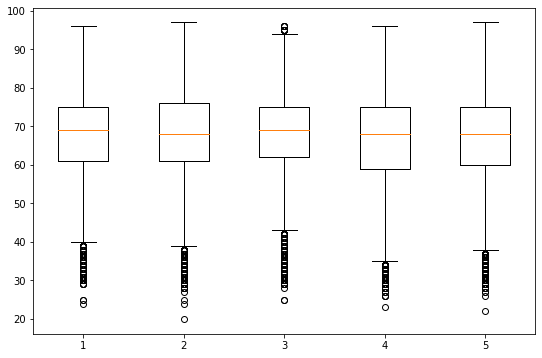

In [0]:
#boxplot untuk cek outlier
data_to_plot = [df['pace'],df['movement_acceleration'],df['movement_sprint_speed'],df['movement_agility'],df['movement_balance']]
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

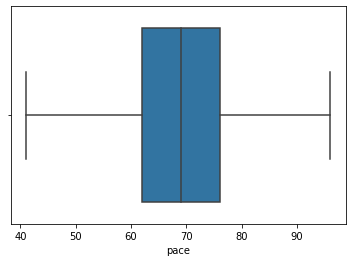

In [0]:
df=df[df.pace>=41]
sn.boxplot(df.pace)

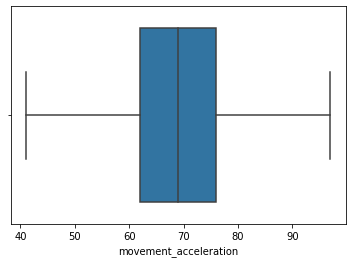

In [0]:
df=df[df.movement_acceleration>=41]
sn.boxplot(df.movement_acceleration)

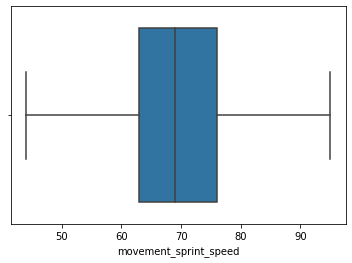

In [0]:
df=df[df.movement_sprint_speed>=44]
df=df[df.movement_sprint_speed<=95]
sn.boxplot(df.movement_sprint_speed)

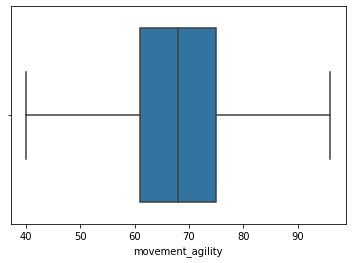

In [0]:
df=df[df.movement_agility>=40]
sn.boxplot(df.movement_agility)

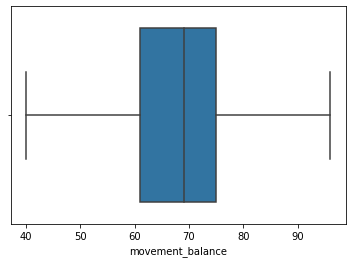

In [0]:
df=df[df.movement_balance>=40]
df=df[df.movement_balance<=96]
sn.boxplot(df.movement_balance)

In [0]:
#menggunakan decision tree pengujian model
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
X = df.drop('pace',axis=1).values
y = df['pace'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.965586368192449
Mean Absolute Error: 0.04009355162044771
Mean Squared Error: 0.053458068827263616
Root Mean Squared Error: 0.23121001022287857


In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [1 1 3 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 8 0 0]
 [0 0 0 ... 0 1 4]
 [0 0 0 ... 0 1 3]]
              precision    recall  f1-score   support

        43.0       0.00      0.00      0.00         0
        44.0       1.00      0.17      0.29         6
        45.0       0.25      1.00      0.40         1
        46.0       0.83      1.00      0.91         5
        47.0       1.00      1.00      1.00         3
        48.0       1.00      0.69      0.82        13
        49.0       0.78      0.93      0.85        15
        50.0       0.83      1.00      0.91        15
        51.0       0.85      0.85      0.85        20
        52.0       0.86      0.86      0.86        29
        53.0       0.97      0.89      0.93        37
        54.0       0.90      0.96      0.93        46
        55.0       0.87      0.87      0.87        39
        56.0       0.98      0.90      0.94        51
        57.0       0.96      0.94      0.95        50
        58.0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#pengujian svm
X = df.drop('pace',axis=1).values
y = df['pace'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.9829602405613097
Mean Absolute Error: 0.017039759438690277
Mean Squared Error: 0.017039759438690277
Root Mean Squared Error: 0.13053642954627753


In [0]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 6 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

        43.0       0.00      0.00      0.00         1
        44.0       0.50      1.00      0.67         1
        45.0       0.67      1.00      0.80         2
        46.0       1.00      0.88      0.93         8
        47.0       1.00      1.00      1.00         7
        48.0       1.00      1.00      1.00         9
        49.0       0.94      0.94      0.94        17
        50.0       0.87      0.93      0.90        14
        51.0       0.94      0.94      0.94        16
        52.0       0.97      0.97      0.97        33
        53.0       0.97      0.97      0.97        34
        54.0       0.98      0.98      0.98        41
        55.0       0.98      0.96      0.97        46
        56.0       0.92      0.98      0.95        45
        57.0       0.98      0.93      0.95        44
        58.0   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#pengujian menggunakan knn
X = df.drop('pace',axis=1).values
y = df['pace'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Accuracy: 0.5168727029736051


In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 0.5168727029736051
Mean Absolute Error: 0.5709989976612095
Mean Squared Error: 0.7921817574340126
Root Mean Squared Error: 0.8900459299575572


In [0]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [2 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 1 0]
 [0 0 0 ... 2 1 1]
 [0 0 0 ... 3 2 0]]
              precision    recall  f1-score   support

        44.0       0.00      0.00      0.00         2
        45.0       0.00      0.00      0.00         3
        46.0       0.14      0.20      0.17         5
        47.0       0.25      0.14      0.18         7
        48.0       0.33      0.46      0.39        13
        49.0       0.50      0.45      0.47        20
        50.0       0.33      0.35      0.34        23
        51.0       0.43      0.36      0.39        25
        52.0       0.47      0.53      0.50        32
        53.0       0.32      0.39      0.35        31
        54.0       0.31      0.32      0.31        44
        55.0       0.43      0.39      0.41        51
        56.0       0.33      0.40      0.36        45
        57.0       0.43      0.46      0.45        56
        58.0       0.44      0.41      0.42        66
        59.0   